<BR>

# Рынок заведений общественного питания Москвы

<BR>

## Описание

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решили обратиться к инвесторам. Их интересует текущее положение дел на рынке.  


## Необходимо

Нам необходимо понять, сможем ли мы снискать популярность на долгое время, когда все насмотрятся на роботов-официантов.

## Данные

Таблица **rest_data** (путь к файлу: /datasets/rest_data.csv. ):  
 - *id* — идентификатор объекта;  
 - *object_name* — название объекта общественного питания;  
 - *chain* — сетевой ресторан;  
 - *object_type* — тип объекта общественного питания;  
 - *address* — адрес;  
 - *number* — количество посадочных мест.

<a id='section_id_100'></a> 

## Оглавление


    
- [Презентация](#section_id_5) 
- [Шаг 1. Общая информация](#section_id_11) 
  - [1.1 Импорт библиотек](#section_id_12) 
  - [1.2 Изучение общей информации](#section_id_12)
  - [1.3 Вывод  ](#section_id_13)
- [Шаг 2. Предобработка данных](#section_id_2)
  - [2.1 Названия объектов общественного питания](#section_id_21)
  - [2.2 Выбросы и нули в количестве посадочных мест ](#section_id_22)
  - [2.3 Вывод  ](#section_id_23)
- [Шаг 3. Анализ данных ](#section_id_3)
  - [3.1 Соотношение объектов общественного питания по количеству ](#section_id_31)
  - [3.2 Соотношение сетевых и несетевых заведений по количеству.](#section_id_32)
  - [3.3 Соотношение вида объекта общественного питания и сетевого распространения](#section_id_33)   
  - [3.4 Характерные черты для сетевых заведений](#section_id_34)
  - [3.5 Среднее количество посадочных мест](#section_id_35)
  - [3.6 Топ-10 улиц по количеству объектов общественного питания](#section_id_36) 
  - [3.7 Улицы с одним объектом общественного питания](#section_id_37)
  - [3.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания](#section_id_38)
- [Шаг 4. Итог](#section_id_4)


<BR>
<a id='section_id_5'></a>    ______________________________________________________________________________________________________________________________

# Презентация 



https://drive.google.com/file/d/1MQlVtSNY9ZfmBn0QdcSI8URkUHHgES6q/view?usp=sharing

<BR>
    ______________________________________________________________________________________________________________________________

# Шаг 1. Изучение общей информации <a id='section_id_1'></a>

## 1.1 Импорт библиотек <a id='section_id_11'></a>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})   # общий стиль для графиков

## 1.2 Изучение общей информации <a id='section_id_12'></a>

In [2]:
# откорем данные, посмотрим первые пять строк таблицы
df = pd.read_csv('/datasets/rest_data.csv')
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


названия столбцов впорядке

In [3]:
# размеры датасета
df.shape

(15366, 6)

In [4]:
# общая информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


тип данных впорядке, пропусков нет

In [5]:
# наличие дубликатов
df.duplicated().sum()

0

In [6]:
# идентификатор объекта 
df['id'].nunique()

15366

15366/15366, id уникальны

In [7]:
# названия объектов общественного питания
df['object_name'].value_counts()

Столовая                                          267
Кафе                                              236
Шаурма                                            234
KFC                                               155
Шоколадница                                       142
                                                 ... 
Буфет «Согдиана»                                    1
Предприятие быстрого обслуживания «ДОДО Пицца»      1
Кафе ДАДА                                           1
Smart Kitchen                                       1
WayMe                                               1
Name: object_name, Length: 10393, dtype: int64

In [8]:
df['object_name'].nunique()

10393

очень много названий, нужно будет проверить на пересечение и совпадение 

In [9]:
# сетевой ресторан
df['chain'].value_counts(dropna=False)

нет    12398
да      2968
Name: chain, dtype: int64

есть только два варианта, пропусков и аномалий не наблюдаем

In [10]:
# типы объектов общественного питания
df['object_type'].value_counts(dropna=False)

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

с типами питания все впорядке

In [11]:
# количество посадочных мест
df['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

максимальное количество мест 1700, минимальное 0, похоже на выбросы и аномалии

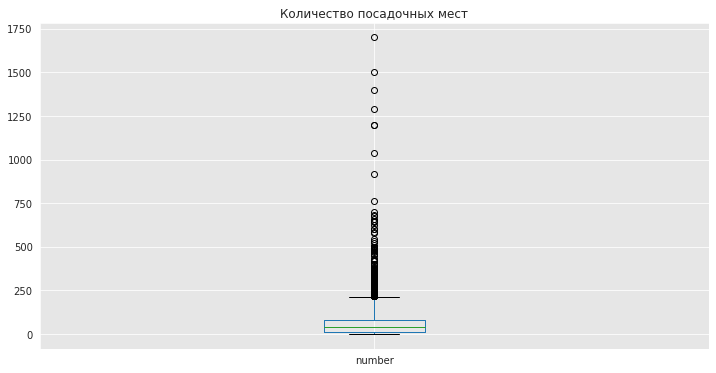

In [12]:
# построим ящик с усами
df.boxplot('number',  figsize=(12,6), whis=[5,95])
plt.title('Количество посадочных мест')
plt.show()

имеются нули и выбросы

## 1.3 Вывод <a id='section_id_13'></a>

**названия столбцов впорядке**  
**типы данных впорядке**  
**пропусков нет**   
**необходимо проверить *object_name*, названия объектов общественного питания**  
**в *number* имеются выбросы и нули**  
  
  
  
[оглавление](#section_id_100)

<BR>
    ______________________________________________________________________________________________________________________________

# Шаг 2. Предобработка данных <a id='section_id_2'></a>

## 2.1  Названия объектов общественного питания<a id='section_id_21'></a>

In [13]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [14]:
# посмотрим 7 самых часто встречаемых названий объектов общественного питания
df['object_name'].value_counts().head(7)

Столовая       267
Кафе           236
Шаурма         234
KFC            155
Шоколадница    142
Макдоналдс     122
Бургер Кинг    122
Name: object_name, dtype: int64

In [15]:
# посмотрим на топ 30 названий
x = list(df['object_name'].value_counts().head(30).index)
x

['Столовая',
 'Кафе',
 'Шаурма',
 'KFC',
 'Шоколадница',
 'Макдоналдс',
 'Бургер Кинг',
 "Домино'с Пицца",
 'Теремок',
 'Крошка Картошка',
 'Пекарня',
 'Милти',
 'Суши Wok',
 'Буфет',
 'СТОЛОВАЯ',
 'Папа Джонс',
 'Школьно-базовая столовая',
 'Кофе с собой',
 'Чайхона №1',
 'КАФЕ',
 'Выпечка',
 'Кафетерий',
 'Хинкальная',
 'Якитория',
 'Додо Пицца',
 'Кофе Хаус',
 'Starbucks',
 'Кофейня',
 'МАКДОНАЛДС',
 'Subway']

In [16]:
# уникальные названия ДО
df['object_name'].nunique()

10393

In [17]:
# приведем все названия к нижнему регистру
df['object_name'] = df['object_name'].str.lower()

In [18]:
# поменяем названия, приведем к одному виду
df['object_name'].replace('subway','сабвей', inplace=True)
df['object_name'].replace('mcdonalds', 'макдоналдс', inplace=True)
df['object_name'].replace('teremok', 'теремок', inplace=True)
df['object_name'].replace('starbucks', 'старбакс', inplace=True)

In [19]:
# уникальные названия ПОСЛЕ
df['object_name'].nunique()

9920

*Убрали 400 названий, которые повторялись, из за того что были напечатаны разным регистром.*  
  
*Менять язык названий, выделять леммы по ключевому слову, или по самому распространенному брэнду считаю не корректно, так как есть понятия авторских прав на название брэнда, из-за чего мы можем объеденить на самом деле разные объекты, в один.*  

*Очень похожие названия могут быть опечаткой человека при заполнении данных, и два названия незначительно отличающиеся, могут на самом деле быть одним и тем же.*  

*А может быть напротив, эти бренды на самом деле являются разными объектами общественного питания, просто их названия очень похожи. Возможно это был замысел авторов.*

*Закон о плагиате, регламентирующий насколько названия разных брендов могут быть похожими, очень размыт.  
Данный вопрос корректней решать в Федеральном институте промышленной собственности.  
Поэтому считаю, что достаточно привести все названия к нижнему регистру, в остальном довериться источнику, и ни чего не менять.*

## 2.2  Выбросы и нули в количестве посадочных мест<a id='section_id_22'></a>

In [20]:
# первые пять строк датасета
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


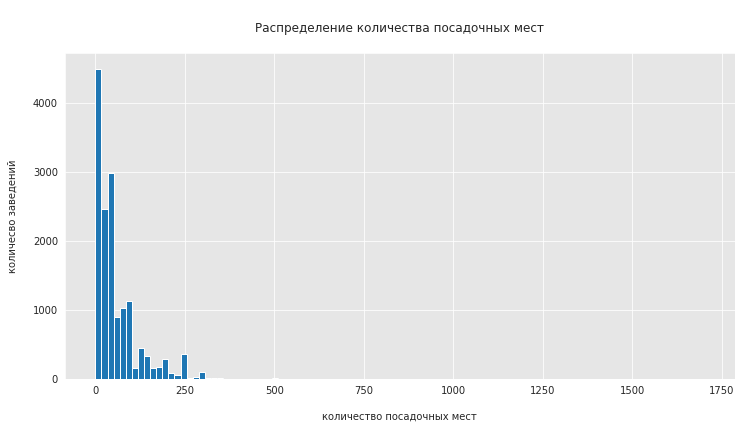

In [21]:
# посмотрим распределение количества посадочных мест на гистограмме
df['number'].hist(bins=100, figsize=(12,6));
plt.title('\nРаспределение количества посадочных мест\n')
plt.xlabel("\nколичество посадочных мест")
plt.ylabel("количесво заведений\n")
plt.show()

In [22]:
# общее количество заведений с количеством посадочных мест равное нулю
df.query('number == 0').shape[0]

1621

In [23]:
df.query('number == 0').sample(10)

,id,object_name,chain,object_type,address,number
13595,223344,шаурма,нет,предприятие быстрого обслуживания,"город Москва, Новослободская улица, дом 35",0
11662,173417,fresh bar,нет,бар,"город Москва, Комсомольская площадь, дом 6, со...",0
11645,182306,правда кофе,нет,кафетерий,"город Москва, Николоямская улица, дом 29, стро...",0
7295,144587,кафе,нет,буфет,"город Москва, Ясеневая улица, дом 13",0
8980,159144,предприятие быстрого питания,нет,предприятие быстрого обслуживания,"город Москва, Южнобутовская улица, дом 50, кор...",0
14910,215253,ciao pizza,нет,кафе,"город Москва, Ходынский бульвар, дом 4",0
11659,173413,чайхона тандыр хаус,нет,кафе,"город Москва, Комсомольская площадь, дом 6, со...",0
13895,206186,кулинария,нет,магазин (отдел кулинарии),"город Москва, Кронштадтский бульвар, дом 47",0
12815,200770,"шаурма, пекарня",нет,закусочная,"город Москва, Уральская улица, дом 4Г",0
10588,185071,кофе,нет,кафе,"город Москва, Челябинская улица, дом 17",0


По закону некоторые виды заведений могут не оборудоваться посадочными местами, таким образом их количество в таблице будет равно нулю.  Возможность проверить реальный тип заведения, с предоставленными в этой таблице, с типами заведений которым по закону можно не иметь посадочных мест, не нахожу.  
  
Поэтому, нули оставляем.

In [26]:
# посмотрим сколько осталось данных
df.shape[0]

15366

## 2.3 Вывод <a id='section_id_23'></a>

**в `object_name` все названия привели к нижнему регистру**  
**в `number` нули оставили, выбросы не трогали**  

 
  
[оглавление](#section_id_100)

<BR>
    ______________________________________________________________________________________________________________________________

# Шаг 3. Анализ данных <a id='section_id_3'></a>

## 3.1 Соотношение объектов общественного питания по количеству  <a id='section_id_31'></a>

In [27]:
# первые пять строк датасета
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<a id='section_id_001'>

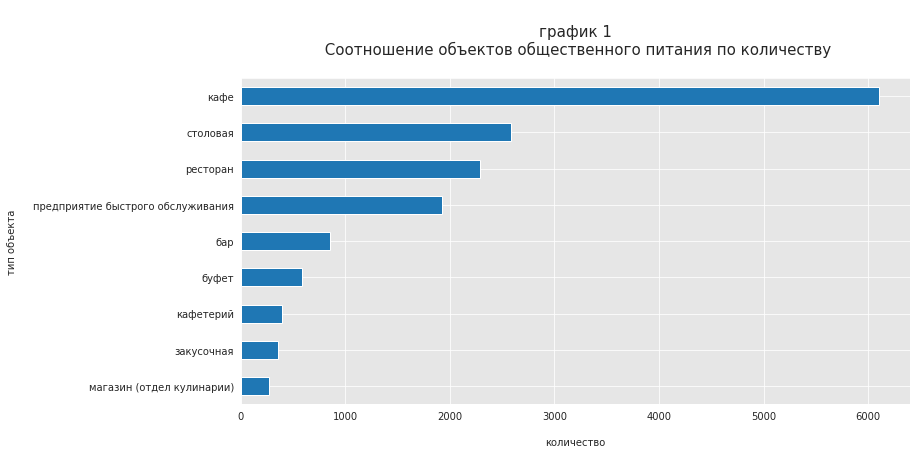

In [28]:
# построим график
df['object_type'].value_counts().sort_values().plot(kind='barh',figsize=(12,6))
plt.title('\nграфик 1\n Соотношение объектов общественного питания по количеству\n',fontsize=15)
plt.xlabel("\nколичество")
plt.ylabel("тип объекта\n")
plt.show()

*кафе, самый популярный тип объекта общественного питание в Москве*
  
[оглавление](#section_id_100)  
  
[итог](#section_id_4)  

## 3.2 Соотношение сетевых и несетевых заведений по количеству<a id='section_id_32'></a>

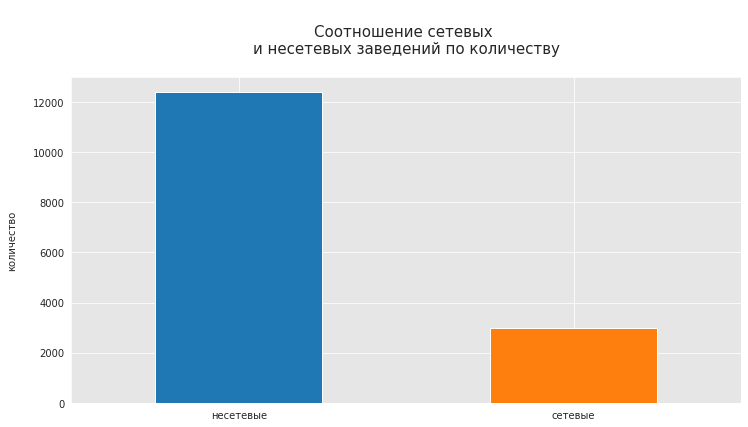

In [29]:
# поменяем значения да/нет на сетевые/частные
df['chain'] = df['chain'].replace('да','сетевые') 
df['chain'] = df['chain'].replace('нет','несетевые')

# визуализируем соотношение сетевых заведений по количеству
df['chain'].value_counts().plot(kind='bar',figsize=(12,6),rot=0, color=['C0','C1'])
plt.title('\nСоотношение сетевых \nи несетевых заведений по количеству\n',fontsize=15) 
plt.ylabel("количество\n")
plt.show()

*сетевых заведений значительно меньше несетевых*
  
[оглавление](#section_id_100)

## 3.3  Соотношение вида объекта общественного питания и сетевого распространения<a id='section_id_33'></a>

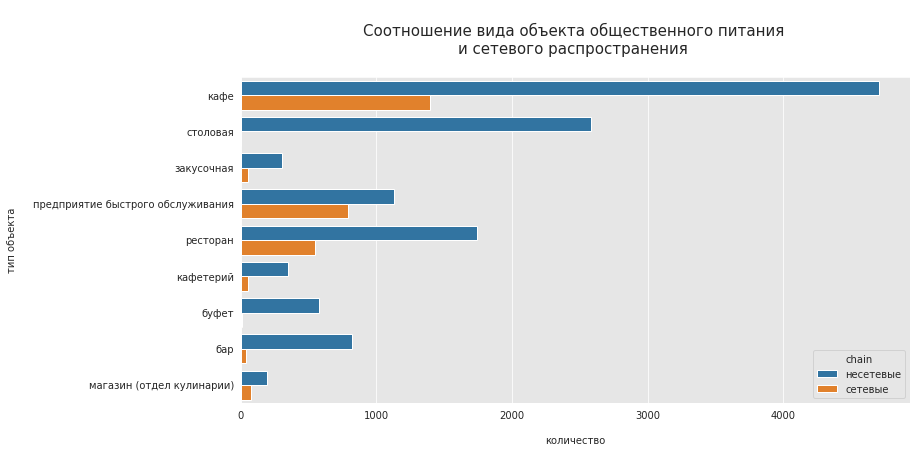

In [30]:
fig = plt.figure(figsize=(12,6))
sns.countplot(y='object_type', hue='chain', data=df)
plt.title('\nСоотношение вида объекта общественного питания \nи сетевого распространения \n',fontsize=15) 
plt.xlabel("\nколичество")
plt.ylabel("тип объекта\n")
plt.show()

In [31]:
# сгруппируем по типу заведений и типу распространения, посчитаем количество заведений
df_chain_count = df.groupby(['object_type','chain'])['id'].count().reset_index().rename(columns={'id':'chain_count'})

In [32]:
# сгруппируем по типу заведений, посчитаем общее количество заведений в каждом типе заведений
df_total_count = df.groupby('object_type')['id'].count().reset_index().rename(columns={'id':'total_count'})

In [33]:
# объеденим данные
df_chain_count = df_chain_count.merge(df_total_count,on='object_type')

In [34]:
# создадим новый столбец, доли сетевых/несетевых заведений в кадом типе заведений
df_chain_count['ratio'] = df_chain_count['chain_count'] * 100 / df_chain_count['total_count']
df_chain_count['ratio'] = df_chain_count['ratio'].round(2)
df_chain_count

,object_type,chain,chain_count,total_count,ratio
0,бар,несетевые,819,856,95.68
1,бар,сетевые,37,856,4.32
2,буфет,несетевые,574,585,98.12
3,буфет,сетевые,11,585,1.88
4,закусочная,несетевые,304,360,84.44
5,закусочная,сетевые,56,360,15.56
6,кафе,несетевые,4703,6099,77.11
7,кафе,сетевые,1396,6099,22.89
8,кафетерий,несетевые,346,398,86.93
9,кафетерий,сетевые,52,398,13.07


<a id='section_id_002'>

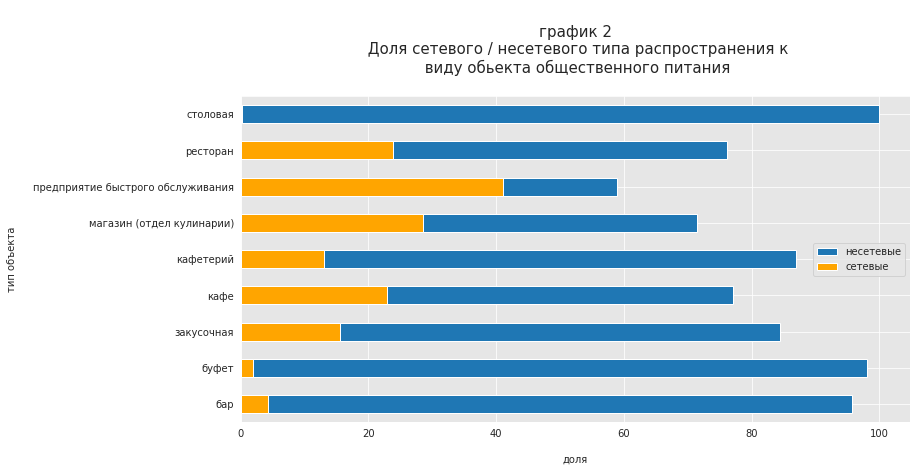

In [35]:
# отрисуем график
ax = df_chain_count.groupby('object_type').agg({'ratio':'max'}).rename(columns={'ratio':'несетевые'})\
.plot(kind='barh',legend=True, figsize=(12,6))

df_chain_count.groupby('object_type').agg({'ratio':'min'}).rename(columns={'ratio':'сетевые'})\
.plot(kind='barh', ax=ax, color='orange', legend=True,figsize=(12,6))

plt.title('\nграфик 2\n Доля сетевого / несетевого типа распространения к\n виду обьекта общественного питания\n',fontsize=15) 
plt.xlabel("\nдоля")
plt.ylabel("тип объекта\n")
plt.show()

*в целом во всех типах заведений, основной тип распространения - несетевой  
самая высокая доля сетевого распространения имеется в фастфуде, почти 40%  
столовых с сетевым распространением вообще нет*  
  
[оглавление](#section_id_100)
  
[итог](#section_id_4)  

## 3.4  Характерные черты для сетевых заведений<a id='section_id_34'></a>

In [36]:
# первые пять строк датасета
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,несетевые,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,несетевые,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевые,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,сетевые,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевые,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


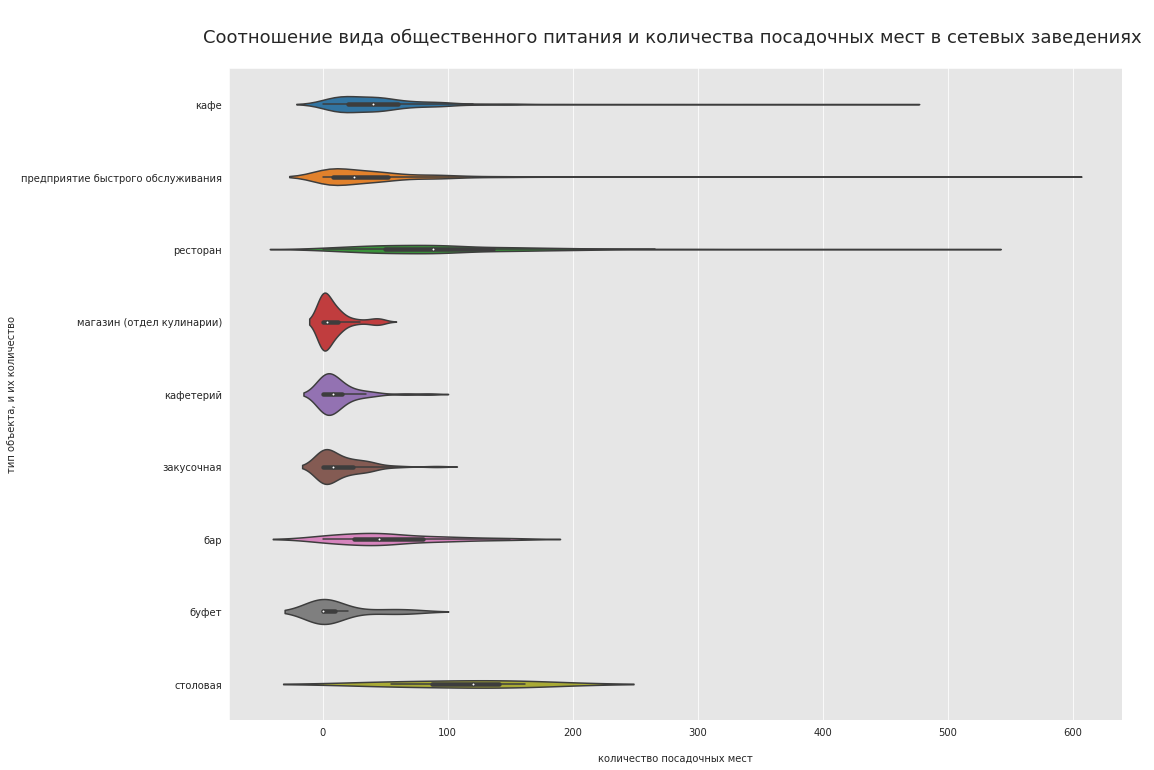

In [37]:
# сформируем срез сетевых объектов
df_chain = df.query('chain == "сетевые"')

# для визуализации соотношения создадим график виолончель 
fig = plt.figure(figsize=(16,12))
sns.violinplot(y='object_type',x='number',data=df_chain)
plt.xlabel("\nколичество посадочных мест")
plt.ylabel("тип объекта, и их количество")
plt.title('\nСоотношение вида общественного питания и количества посадочных мест в сетевых заведениях \n',fontsize=18) 
plt.show()

*в заведениях с сетевым типом распространения  
большинство типов заведения имеют большее количество точек, с небольшим количеством посадочных мест  
только рестораны и столовые имееют среднее количество посадочных мест около 100, и их совсем не много* 

Посмотрим на характерное распределение посадочных мест, в зависимости от размера филиальной сети

In [38]:
# найдем размер сети филиалов
net_size = df_chain.groupby('object_name').agg({'object_name':'count'}).rename(columns={'object_name':'net_size'})
net_size = net_size.sort_values('net_size', ascending=False)

In [39]:
# присоединяем по названию размер сети
df_chain = df_chain.merge(net_size, on='object_name')

<a id='section_id_003'>

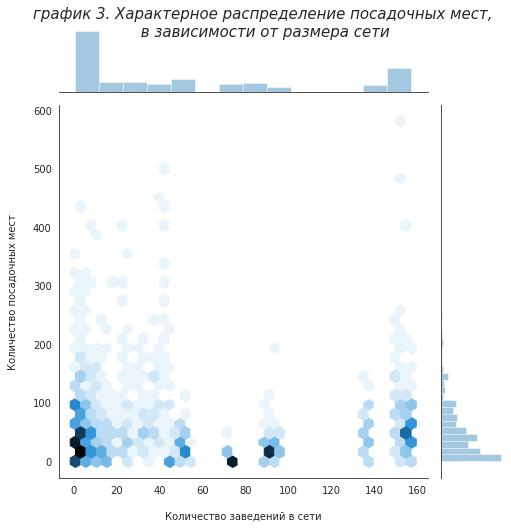

In [40]:
# отрисуем график
with sns.axes_style("white"):
    ax = sns.jointplot(x='net_size', y='number', data=df_chain, kind='hex', height=7, bins=20)

plt.suptitle('график 3. Характерное распределение посадочных мест,\n в зависимости от размера сети\n', y=1.02, fontsize=15, style="italic")
ax.set_axis_labels('\nКоличество заведений в сети', 'Количество посадочных мест\n');    

*Преобладают заведения с малым количеством филиалов и малым количеством посадочных мест, также достаточно много сетей с большим количеством филиалов и малым числом посадочных мест. Общий тренд - число посадочных мест не более 100.*


  
[оглавление](#section_id_100)  
  
[итог](#section_id_4)     

## 3.5  Среднее количество посадочных мест<a id='section_id_35'></a>

Для каждого вида объекта общественного питания определим среднее количество посадочных мест.  


<a id='section_id_004'>

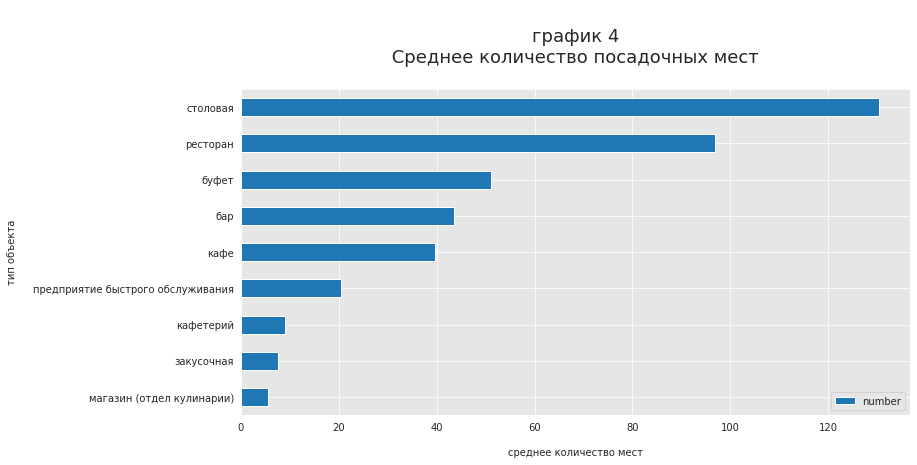

In [41]:
# сгруппируем по виду, посчитаем среднее, и построим график
df.groupby('object_type').agg({'number':'mean'}).sort_values(by='number').plot(kind='barh',figsize=(12,6))
plt.title('\nграфик 4\n Cреднее количество посадочных мест \n',fontsize=18) 
plt.xlabel("\nсреднее количество мест")
plt.ylabel("тип объекта\n")
plt.show()

*Столовые и рестораны в среднем имеют наибольшее количество посадочных мест*

 
  
[оглавление](#section_id_100)  
  
[итог](#section_id_4)    

## 3.6 Топ-10 улиц по количеству объектов общественного питания <a id='section_id_36'></a>

Построем график топ-10 улиц по количеству объектов общественного питания.  
Воспользуемся внешней информацией, что бы понять — в каких районах Москвы находятся эти улицы

In [42]:
# подгрузим данные с адресами районов и улиц Москвы
df_street_moscow = pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')

# оставим только названия улиц и районов
df_street_moscow = df_street_moscow[['streetname','area']]

# выведем первые пять строк
df_street_moscow.head()

,streetname,area
0,Выставочный переулок,Пресненский район
1,улица Гашека,Пресненский район
2,Большая Никитская улица,Пресненский район
3,Глубокий переулок,Пресненский район
4,Большой Гнездниковский переулок,Пресненский район


In [43]:
# создадим словарь 'район' / 'количество улиц встречающихся в нем'
dict_count_area = dict(df_street_moscow['area'].value_counts())

In [44]:
# добавим стобец с количеством улиц в районе напротив каждого района
def f_rank(x):
    return dict_count_area[x]

df_street_moscow['area_rank'] = df_street_moscow['area'].apply(f_rank) 

In [45]:
# переименум столбцы
df_street_moscow.columns = ['street','area','area_rank']

In [46]:
# создадим список улиц Москвы
list_street_moscow = df_street_moscow.groupby('street')['street'].max()
list_street_moscow = list(list_street_moscow)

In [47]:
#len(list_street_moscow)

In [48]:
# функция для того что бы убрать пробелы в начале и конце строк адресов    
def f_strip(x):
    l = []
    for i in x:
        i = i.strip()
        l.append(i)
    return l 

# функция для проверки наличия адреса в общем списке улиц Москвы list_street_moscow
def f_search(x):
    l = []
    for i in x:
        if i in list_street_moscow:
            l.append(i)
        else:
            continue
            
    if len(l) == 0:
        l.append('пусто')
    for j in l:
        return j          

In [49]:
# создадим новый столбец street в df, применив функцию split к address
df['street'] = df['address'].str.split(',')

# далее уберем пробелы из всех строк street с помощью f_strip
df['street'] = df['street'].apply(f_strip)

# проведем поиск адресов из общего списка адресов применив функцию f_search
df['street'] = df['street'].apply(f_search)

# выведем первые пять строк
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,несетевые,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевые,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевые,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевые,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевые,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [50]:
# проверим что получилось, посмотрим топ-10 улиц по количеству заведений, а так же проверим есть ли потеряшки
df['street'].value_counts(dropna=False).head(10)

пусто                     613
город Зеленоград          232
проспект Мира             204
Профсоюзная улица         183
Ленинградский проспект    173
Пресненская набережная    167
Варшавское шоссе          165
Ленинский проспект        148
проспект Вернадского      132
Кутузовский проспект      114
Name: street, dtype: int64

613 адреса не нашлось в общем списке адресов  
232 адреса относятся к городу Зеленоград

In [51]:
df_street_moscow.query('street == "город Зеленоград"')

,street,area,area_rank
1700,город Зеленоград,Район Крюково,53
1757,город Зеленоград,Район Матушкино-Савелки,39
1801,город Зеленоград,Панфиловский район,29


город Зеленоград, один из 12 административных округов Москвы. Расположен в 37 км к северо-западу от центра Москвы.  
Первый из трёх округов, которые были образованы на территориях, полностью находящихся за пределами Московской кольцевой автомобильной дороги.  
Мы рассматриваем перспективы будующего заведения общественного питания непосредственно в Москве.  
Поэтому адреса находящиеся в городе Зеленоград будут сильно искажать статистику, и дальнейший анализ.

In [52]:
# уберем город Зеленоград из бощего датасета
df = df.query('street != "город Зеленоград"')

In [53]:
# проверим адреса 'пусто'
df.query('street == "пусто"').head()

,id,object_name,chain,object_type,address,number,street
1461,106204,кафе «шашлычок»,несетевые,кафе,"город Москва, 3-й Митинский переулок, дом 1",44,пусто
1665,25308,ани,несетевые,кафе,"город Москва, улица Руднёвка, дом 14",32,пусто
1690,156219,пицца лэнд,несетевые,предприятие быстрого обслуживания,"город Москва, проспект Защитников Москвы, дом 14",20,пусто
1737,69842,чайхона №1,сетевые,ресторан,"город Москва, улица Мичуринский Проспект, Олим...",94,пусто
1853,77651,щербенко л.а.,несетевые,кафе,"город Москва, поселение Вороновское, село Воро...",50,пусто


In [54]:
# попробуем еще раз найти эти адреса в общем списке
x = list(df.query('id == 106204')['address'])
x = x[0].split(',')
s = []
for i in x:
    i = i.strip()
    s.append(i)
s[1] in list_street_moscow

False

In [55]:
print()
print('районы НЕ определены:', df.query('street == "пусто"')['street'].count())
print()
print('общее количество адресов:',df['street'].count())


районы НЕ определены: 613

общее количество адресов: 15134


In [56]:
print()
print('некорректные данные:', '{:.2%}'.format(613/15134))


некорректные данные: 4.05%


Скорее всего адреса заведений были введены с ошибкой, что не позволяет корректно идентифицировать их, и в дальнейшем определить их район. Потери данных для дальнейшего анализа составляют 4%

In [57]:
# уберем "пусто"
df = df.query('street != "пусто"')

<a id='section_id_005'>

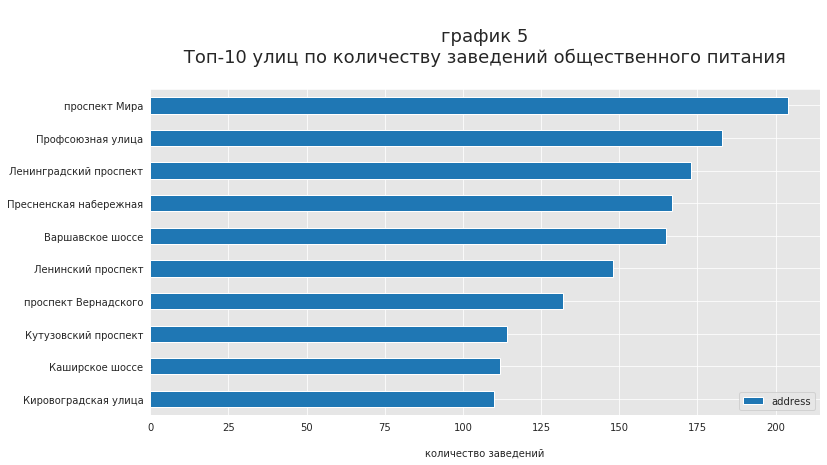

In [58]:
# построим график топ-10 улиц по количеству заведений общественного питания
top10_streets = df.groupby('street').agg({'address':'count'}).sort_values(by='address',ascending=True).tail(10)
top10_streets.plot(kind='barh',figsize=(12,6))
plt.title('\nграфик 5\n Топ-10 улиц по количеству заведений общественного питания \n',fontsize=18) 
plt.xlabel("\nколичество заведений")
plt.ylabel("\n")
plt.show()

на проспекте Мира находиться наибольшее количество заведений общественного питания  
  
[итог](#section_id_4)   

<BR>

Так как улицы могут проходить через несколько районов, посмотрим сначала на топ-10 районов по числу объектов общественного питания находящихся в них

In [63]:
# создадим список с улицами и количеством заведений на них
street_count = df.groupby('street')['id'].count().reset_index().rename(columns={'id':'street_count'})

In [64]:
# присоединим его списку улиц/районов
df_street_moscow_count = df_street_moscow.merge(street_count,on='street')

в *df_street_moscow_count* остались районы, улицы проходящие через них, *area_rank* общее количество улиц в районе, и *street_count* количество заведений на улице

In [65]:
# добавим районы и количество заведений на улице к общему датасету, сохраним в новой переменной df_area_rank
df_area_rank = df.merge(df_street_moscow_count,on='street')

In [66]:
# сгруппируем по району и улице, напротив улиц оставим число заведений
top_area = df_area_rank.groupby(['area','street'])['street_count'].max().reset_index()

# еще раз сгруппируем по району, суммируем число заведений
top_area = top_area.groupby('area')['street_count'].sum().reset_index()

# отсортируем, оставим топ-10
top_area = top_area.sort_values(by='street_count',ascending=False).head(10)

<a id='section_id_008'>

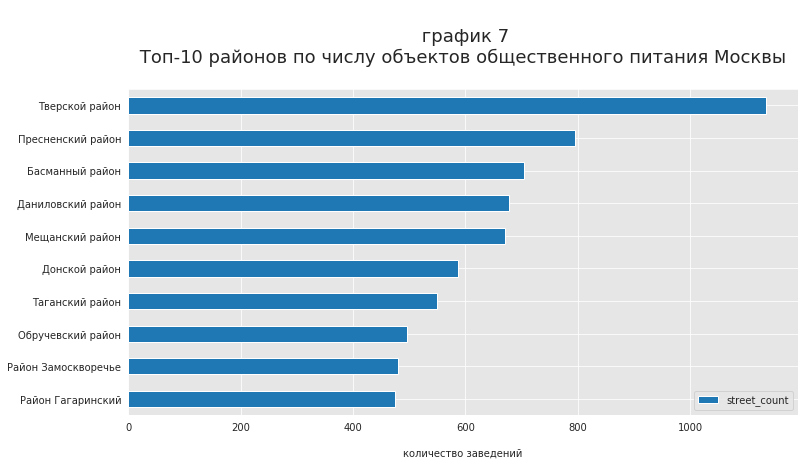

In [67]:
# визуализируем
top_area.sort_values(by='street_count',ascending=True).plot(kind='barh',x='area',figsize=(12,6))
plt.title('\n график 7\n Топ-10 районов по числу объектов общественного питания Москвы \n',fontsize=18) 
plt.xlabel("\nколичество заведений")
plt.ylabel("\n")
plt.show()

Районы с наибольшем количеством заведений на каждой улице. Наибольшее количество заведений находится в Тверском районе, затем идет Пресненский район, затем  Басманный район, потом Даниловский район. Всё это центральные районы Москвы. 


  
[оглавление](#section_id_100)  
  
[итог](#section_id_4)     

Теперь посмотрим на топ-10 районы через которые проходят топ-10 улиц

In [68]:
# выделим список улиц топ-10 по количеству заведений
top10_streets = top10_streets.reset_index()
top_streets = top10_streets[['street']]

In [74]:
# к списку улиц топ-10 добавим районы через которые они проходят
area_top_streets = top_streets.merge(df_street_moscow_count,on='street')

In [75]:
# количество улиц
area_top_streets['street'].nunique()

10

In [76]:
# количествоо районов через которые они проходят
area_top_streets['area'].nunique()

37

In [77]:
# посмотрим через сколько районов проходят каждая из них
area_top_streets['street'].value_counts()

Варшавское шоссе          8
Ленинский проспект        8
проспект Мира             7
Профсоюзная улица         6
проспект Вернадского      5
Ленинградский проспект    4
Каширское шоссе           4
Кировоградская улица      3
Кутузовский проспект      2
Пресненская набережная    1
Name: street, dtype: int64

In [78]:
# посмотрим через какие районы проходият улицы 
area_top_streets.groupby('street')['area'].value_counts()

street                  area                           
Варшавское шоссе        Донской район                      1
                        Нагорный район                     1
                        Район Нагатино-Садовники           1
                        Район Северное Бутово              1
                        Район Чертаново Северное           1
                        Район Чертаново Центральное        1
                        Район Чертаново Южное              1
                        Район Южное Бутово                 1
Каширское шоссе         Район Москворечье-Сабурово         1
                        Район Нагатино-Садовники           1
                        Район Орехово-Борисово Северное    1
                        Район Орехово-Борисово Южное       1
Кировоградская улица    Район Чертаново Северное           1
                        Район Чертаново Центральное        1
                        Район Чертаново Южное              1
Кутузовский проспект    Район

<BR>


  
[оглавление](#section_id_100)  
    

## 3.7 Улицы с одним объектом общественного питания <a id='section_id_37'></a>

Найдем количество улиц с одним объектом общественного питания.  
Определим в каких районах Москвы находятся эти улицы.

In [79]:
# сгруппируем все по улицам, посчитаем количество заведений, сделаем срез
street_one = df.groupby('street').agg({'id':'count'}).reset_index().query('id == 1')
street_one.shape[0]

518

в Москве есть 518 улицы со всего одним заведением

Посмотрим какие районы включают в себя улицы с одним заведением

In [80]:
# присоедимним районы 
area_street_one = street_one.merge(df_street_moscow,on='street')
area_street_one.groupby('area')['area'].count().shape[0]

99

в 99 районах Москвы, есть улицы с всего одним заведением

In [81]:
# сгрупперуем по районам, посчитаем количество улиц для каждого
top_area_street_one = area_street_one.groupby('area')['street'].count().reset_index()
top_area_street_one = top_area_street_one.sort_values(by='street',ascending=False).head(10)
top_area_street_one

,area,street
93,Таганский район,27
79,Район Хамовники,26
3,Басманный район,25
94,Тверской район,20
20,Пресненский район,20
21,Район Арбат,18
50,Район Марьина роща,18
13,Мещанский район,16
73,Район Сокольники,15
33,Район Замоскворечье,14


<a id='section_id_007'>

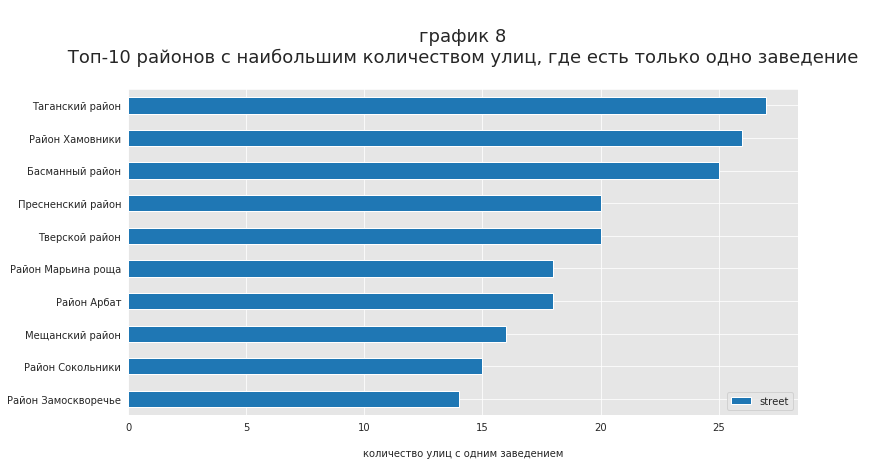

In [82]:
# визуализируем графиком
top_area_street_one.sort_values(by='street',ascending=True).plot(kind='barh',x='area',y='street',figsize=(12,6))
plt.title('\nграфик 8\n Топ-10 районов с наибольшим количеством улиц, где есть только одно заведение \n',fontsize=18) 
plt.xlabel("\nколичество улиц с одним заведением")
plt.ylabel("\n")
plt.show()

*Из открытых источников известно, что в Москве имеется 130 районов. 95 районов имеют улицы с 1 заведением.  
В Москве имеется большое количество районов, в которых есть улицы с 1 заведением. Практически все из топ-10 районов, имеющих улицы с одним заведением, находятся в центральной части Москвы. Это можно объяснить наличием в центре большого количества небольших алей, улиц, закоулков, "старая" центральная Москва строилась иначе из-за этого имеет такие небольшие улицы.*

 
  
[оглавление](#section_id_100)  
  
[итог](#section_id_4)     

## 3.8 Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания <a id='section_id_38'></a>

In [83]:
# определим большое количество заведений на улице, как большее среднего
# так как у нас много заведений с количеством посадочных мест равное нулю, среднее посчитаем медианой
many_count = df.groupby('street')['id'].count().median()
many_count

3.0

улицы имеющие заведения общественного питания, в среднем имеют три таких заведения

In [84]:
# создадим список улиц с количеством заведений больше среднего
streets_many_count = df.groupby('street')['id'].count().reset_index().query('id > @many_count')
streets_many_count = streets_many_count[['street']]

In [85]:
# присоединим к нему общую информацию 
df_streets_many_count = streets_many_count.merge(df,on='street')

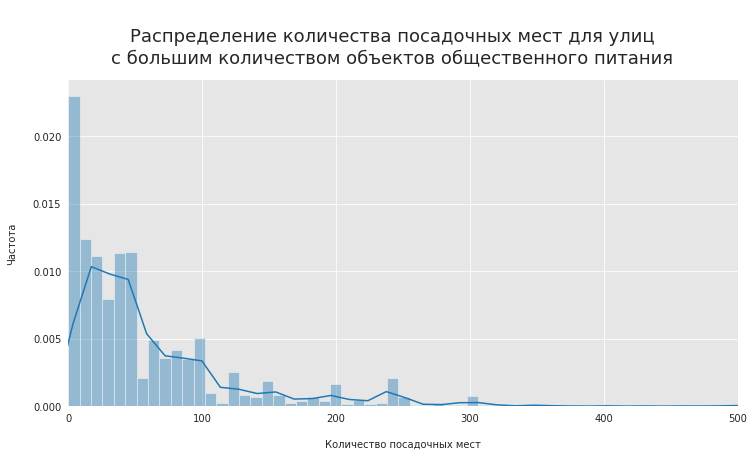

In [86]:
# построим график
fig, ax = plt.subplots(figsize=(12,6))
fig.suptitle('\nРаспределение количества посадочных мест для улиц\nс большим количеством объектов общественного питания\n',
             y=1.05,fontsize=18)

sns.distplot(df_streets_many_count['number'],bins=200)
sns.despine(left=True, bottom=True)

ax.set_xlim([0, 500])
ax.set_ylabel('Частота\n')
ax.set_xlabel('\nКоличество посадочных мест');

*Среди заведений, находящихся на наиболее популярных улицах, преобладают заведения с количеством мест до 50. Имеется достаточно большой всплеск количества заведений с числом посадочных мест меньше 10. Скорее всего это обусловлено тем, что такие места находятся в торговых комплексах на фудкортах, однако не стоит исключать и факт, что это может быть небольшой бар, кофе на вынос и т.п.*

 
  
[оглавление](#section_id_100)

<BR>
    ______________________________________________________________________________________________________________________________

# Шаг 4. Итог <a id='section_id_4'></a>


Исследованы открытые данные о заведениях общественного питания Москвы. В ходе анализа изучены соотношения видов объектов заведений по количеству, сетевых и несетевых заведений по количеству, характерность сетевого распространения по каждому виду заведений, характерная зависимость числа посадочных мест от количества филиалов заведений, описано среднее количество посадочных мест по каждому виду, найден топ-10 улиц с наибольшим количеством заведений, найдены районы с наибольшим количеством заведений для каждой улицы, найдены улицы с одним объектом питания, найдены районы прохождения таких улиц, изучено распределение посадочных мест для улиц с большим количеством заведений, найдено характерное количество посадочных мест.

Среди видов объектов общественного питания явно преобладают кафе, затем идут рестораны, столовые и предприятия быстрого обслуживания. Наименьшее количество кафетериев, закусочных и отделов кулинарии в магазинах. При этом, преобладают несетевые заведения. [(см.график 1)](#section_id_001)

Сетевое распространение наиболее характерно (в порядке убывания) для кафе, заведений быстрого обслуживания и ресторанов. Однако, только у быстрого обслуживания число сетевых заведений приближается к несетевым, тогда как среди кафе и ресторанов разница значительна. Сетевых столовых нет, имеется некоторое количество буфетов и баров. [(см.график 2)](#section_id_002)

В сетевых заведениях, большинство имеет большее количество филиалов, с небольшим количеством посадочных мест.
Только рестораны и столовые имееют среднее количество посадочных мест около 100.[(см.график 3)](#section_id_003)

В среднем, наибольшее количество посадочных мест в столовых и ресторанах. Кафе находится в середине списка со средним количеством посадочныч мест около 40.[(см.график 4)](#section_id_004)


В топ-10 улиц по числу объектов общественного питания лидирует проспект Мира, затем идет Профсоюзная улица и Ленинградский проспект. [(см.график 5)](#section_id_005)

Районы через которые проходят эти улицы, Ярославский район, район Ясенево, Хорошевский район, Пресненский район.[(см.график 6)](#section_id_006)

Топ-10 районов по числу объектов обществоенного питания возглавляют Тверской район, Пресненский район, Таганский район, и Басманный район. [(см.график 7)](#section_id_008)

Больше всего улиц с одним заведением в Таганском районе, районе Хамовники и Басманном районе.[(см.график 8)](#section_id_007)

Среди заведений, находящихся на наиболее популярных улицах, преобладают заведения с количеством мест до 50. Имеется достаточно большой всплеск количества заведений с числом посадочных мест меньше 10. Скорее всего это обусловлено тем, что такие места находятся в торговых комплексах на фудкортах, однако не стоит исключать и факт, что это может быть небольшой бар, кофе на вынос и т.п.

Принимая во внимание вышеописанное, стоит предложить выбрать форматом заведения - кафе, с числом посадочных мест не более 50. Предлагаю разместить его в Тверском районе - данный район хоть и имеет большое количество заведений и большую конкуренцию, является привлекательным с точки зрения проходимости. Эксклюзивность формата - обслуживание роботами - является значительным плюсом. Стоит предположить, что небольшое количество посадочных мест создаст дополнительный ажиотаж и повышенный спрос, что в будущем позволяет рассмотреть возможность расширения и открытия нескольких филиалов. Прогнозируемое число филиалов требует дополнительного анализа финансовых показателей головного заведения.


  
[оглавление](#section_id_100)

<BR>
    ______________________________________________________________________________________________________________________________

<BR>